In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy as sc

### Part 1

In [3]:
# algorithm 1 - slide 9
n = 1000 
U = np.random.uniform(0, 1, n) 
Y = np.sin(np.pi * U) 
estimator = np.pi * np.mean(Y)
print(estimator)

1.9873084196689486


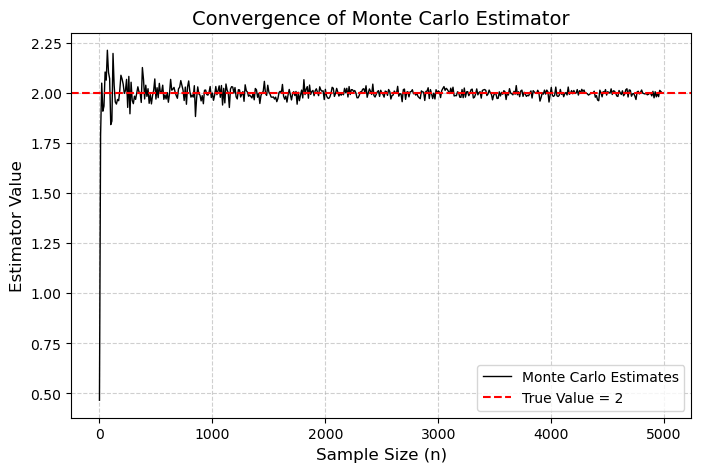

In [4]:
# true value of the integral
true_value = 2
n_values = np.arange(1, 5001, 10)
estimates = []

# compute the estimator for each n
for n in n_values:
    U = np.random.uniform(0, 1, n)
    Y = np.sin(np.pi * U)
    estimator = np.pi * np.mean(Y)
    estimates.append(estimator)

estimates = np.array(estimates)

# plot
plt.figure(figsize=(8, 5))
plt.plot(n_values, estimates, label="Monte Carlo Estimates", color="black", linewidth=1)
plt.axhline(true_value, color="red", linestyle="--", label="True Value = 2")
plt.xlabel("Sample Size (n)", fontsize=12)
plt.ylabel("Estimator Value", fontsize=12)
plt.title("Convergence of Monte Carlo Estimator", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [5]:
# algorithm 2 - slide 10
n = 1000
U = np.random.uniform(0, 1, n)
V = np.random.uniform(0, 1, n)
Y = np.sqrt(U + V) * np.exp(U * V)
estimator = np.mean(Y)
print(estimator)

1.327011366342702


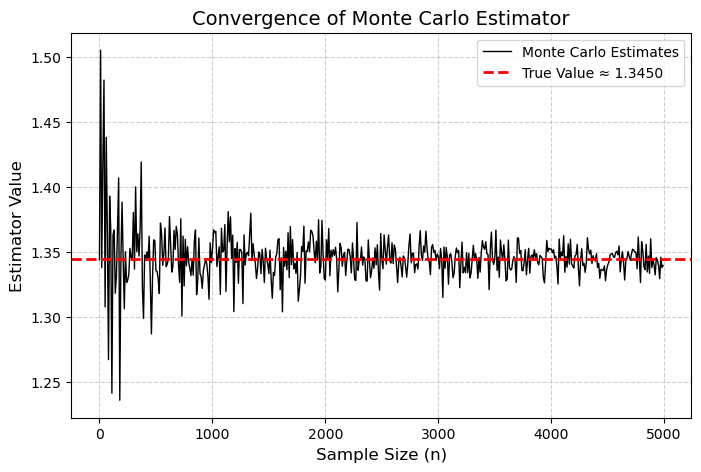

In [6]:
# true value (we'll approximate it using a very large n)
n_true = 2_000_000
U_true = np.random.uniform(0, 1, n_true)
V_true = np.random.uniform(0, 1, n_true)
Y_true = np.sqrt(U_true + V_true) * np.exp(U_true * V_true)
true_value = np.mean(Y_true)

# range of sample sizes
n_values = np.arange(1, 5001, 10)
estimates = []
std_errors = []

# compute the estimator for each n
for n in n_values:
    U = np.random.uniform(0, 1, n)
    V = np.random.uniform(0, 1, n)
    Y = np.sqrt(U + V) * np.exp(U * V)
    est = np.mean(Y)
    estimates.append(est)

estimates = np.array(estimates)

# plot
plt.figure(figsize=(8, 5))
plt.plot(n_values, estimates, color="black", linewidth=1, label="Monte Carlo Estimates")
plt.axhline(true_value, color="red", linestyle="--", linewidth=2, label=f"True Value ≈ {true_value:.4f}")
plt.xlabel("Sample Size (n)", fontsize=12)
plt.ylabel("Estimator Value", fontsize=12)
plt.title("Convergence of Monte Carlo Estimator", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Part 3

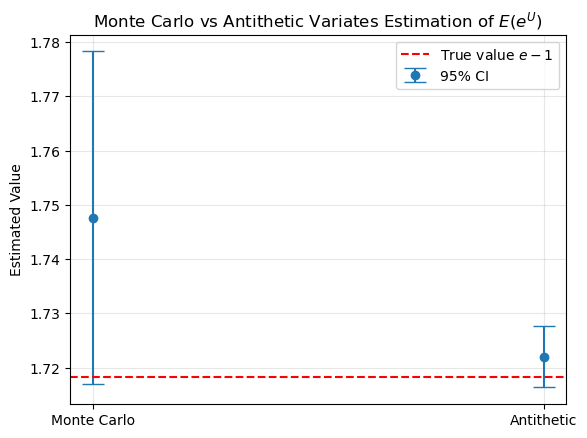

In [7]:
# MC vs. Antithetic
n = 1000
m = n // 2

# antithetic variates
ant_u = np.random.uniform(0, 1, m)
ant_g = (np.exp(ant_u) + np.exp(1 - ant_u)) / 2
ant_estimator = np.mean(ant_g)
ant_ci = (
    ant_estimator - 1.96 * np.std(ant_g, ddof=1) / np.sqrt(m),
    ant_estimator + 1.96 * np.std(ant_g, ddof=1) / np.sqrt(m)
)

# monte carlo
mc_u = np.random.uniform(0, 1, n)
mc_g = np.exp(mc_u)
mc_estimator = np.mean(mc_g)
mc_ci = (
    mc_estimator - 1.96 * np.std(mc_g, ddof=1) / np.sqrt(n),
    mc_estimator + 1.96 * np.std(mc_g, ddof=1) / np.sqrt(n)
)

# plot
true_value = np.e - 1
methods = ['Monte Carlo', 'Antithetic']
estimates = [mc_estimator, ant_estimator]
errors = [mc_estimator - true_value, ant_estimator - true_value]
cis = [[mc_estimator - mc_ci[0], mc_ci[1] - mc_estimator],
    [ant_estimator - ant_ci[0], ant_ci[1] - ant_estimator]]

plt.errorbar(methods, estimates, yerr=np.array(cis).T, fmt='o', capsize=8, label="95% CI")
plt.axhline(true_value, color='red', linestyle='--', label=r"True value $e-1$")
plt.title("Monte Carlo vs Antithetic Variates Estimation of $E(e^U)$")
plt.ylabel("Estimated Value")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Part 4

In [8]:
# basic Monte Carlo estimator
n = 1000
U = np.random.uniform(0, 1, n)
G = np.exp(-U**4)
mc_estimator = np.mean(G)
mc_ci = (
    mc_estimator - 1.96 * np.std(G, ddof=1) / np.sqrt(n),
    mc_estimator + 1.96 * np.std(G, ddof=1) / np.sqrt(n)
)

# importance sampling estimator
C = np.e / (np.e - 1)
U = np.random.uniform(0, 1, n)
Y = np.log(C / (C - U))  # inverse transform sampling
G1 = 1/C * np.exp(Y - Y**4)
is_estimator = np.mean(G1)

is_ci = (
    is_estimator - 1.96 * np.std(G1, ddof=1) / np.sqrt(n),
    is_estimator + 1.96 * np.std(G1, ddof=1) / np.sqrt(n)
)

# results
print(f"Basic Monte Carlo Estimate: {mc_estimator:.6f}")
print(f"95% CI: {mc_ci}")
print()
print(f"Importance Sampling Estimate: {is_estimator:.6f}")
print(f"95% CI: {is_ci}")

Basic Monte Carlo Estimate: 0.843569
95% CI: (np.float64(0.8318710882106588), np.float64(0.8552659939726239))

Importance Sampling Estimate: 0.845198
95% CI: (np.float64(0.837588365268801), np.float64(0.8528069022503584))


### Part 5

In [9]:
# basic Monte Carlo estimator
n = 1000
U = np.random.uniform(0, 1, n)
G = np.log(2*U**2+1)
mc_estimator = np.mean(G)
mc_ci = (
    mc_estimator - 1.96 * np.std(G, ddof=1) / np.sqrt(n),
    mc_estimator + 1.96 * np.std(G, ddof=1) / np.sqrt(n)
)

# Control Variates estimator
G1 = np.log(2*U**2+1) - U
cv_estimator = np.mean(G1) + 0.5
cv_ci = (
    cv_estimator - 1.96 * np.std(G, ddof=1) / np.sqrt(n),
    cv_estimator + 1.96 * np.std(G, ddof=1) / np.sqrt(n)
)

# results
print(f"Basic Monte Carlo Estimate: {mc_estimator:.6f}")
print(f"95% CI: {mc_ci}")
print()
print(f"Importance Sampling Estimate: {cv_estimator:.6f}")
print(f"95% CI: {cv_ci}")

Basic Monte Carlo Estimate: 0.440009
95% CI: (np.float64(0.41858763621304473), np.float64(0.4614303149008959))

Importance Sampling Estimate: 0.447804
95% CI: (np.float64(0.42638259491145797), np.float64(0.46922527359930916))


### Part 6

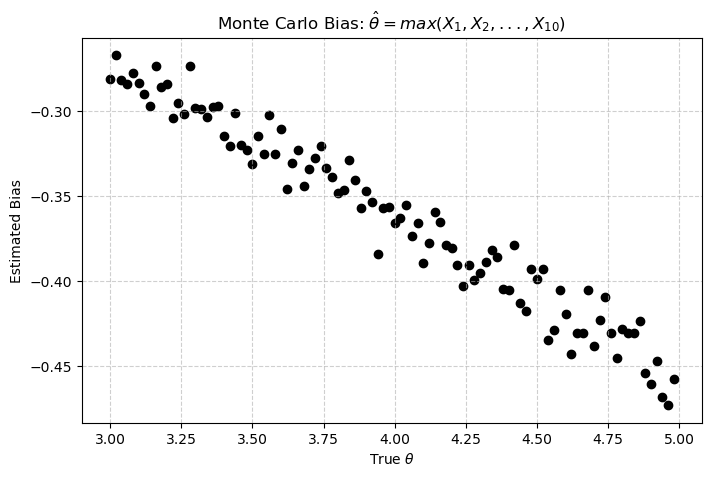

In [10]:
n, m, J = 1000, 10, 100
bias = []
theta = []

for j in range(J):
    rational_p = 3 + 2*j/100
    theta.append(rational_p)
    e = []
    for i in range(n):
        u = np.random.uniform(0, rational_p, m)
        e.append(np.max(u))
    
    bias.append(np.mean(e) - rational_p)

# plot
plt.figure(figsize=(8, 5))
plt.scatter(theta, bias, color="black", marker='o')
plt.xlabel(r"True $\theta$")
plt.ylabel("Estimated Bias")
plt.title("Monte Carlo Bias: $\hat{\\theta} = max(X_{1},X_{2}, ... , X_{10})$")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

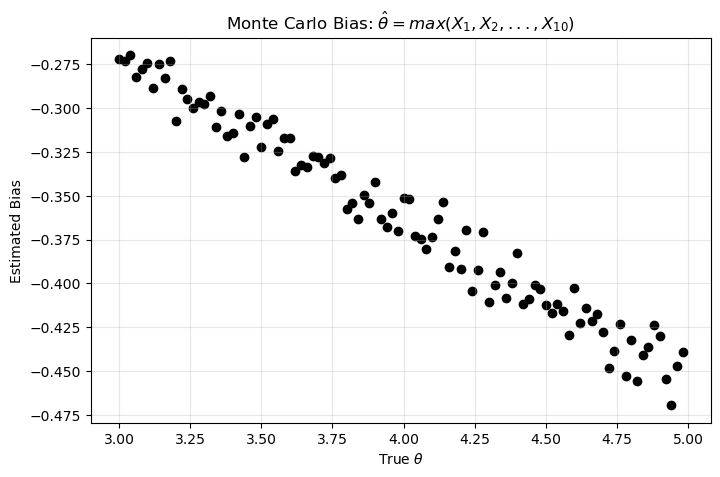

In [11]:
# OR
n, m, J = 1000, 10, 100
theta = 3 + 2 * np.arange(J) / 100
bias = np.zeros(J)

for j, t in enumerate(theta):
    U = np.random.uniform(0, t, size=(n, m))  # matrix of shape (n, m)
    est = np.max(U, axis=1)                   # max over columns ==> vector of length n
    bias[j] = np.mean(est) - t                # mean difference

# plot
plt.figure(figsize=(8, 5))
plt.scatter(theta, bias, color='black')
plt.xlabel(r"True $\theta$")
plt.ylabel("Estimated Bias")
plt.title("Monte Carlo Bias: $\hat{\\theta} = max(X_{1},X_{2}, ... , X_{10})$")
plt.grid(True, alpha=0.3)
plt.show()

### Part 7

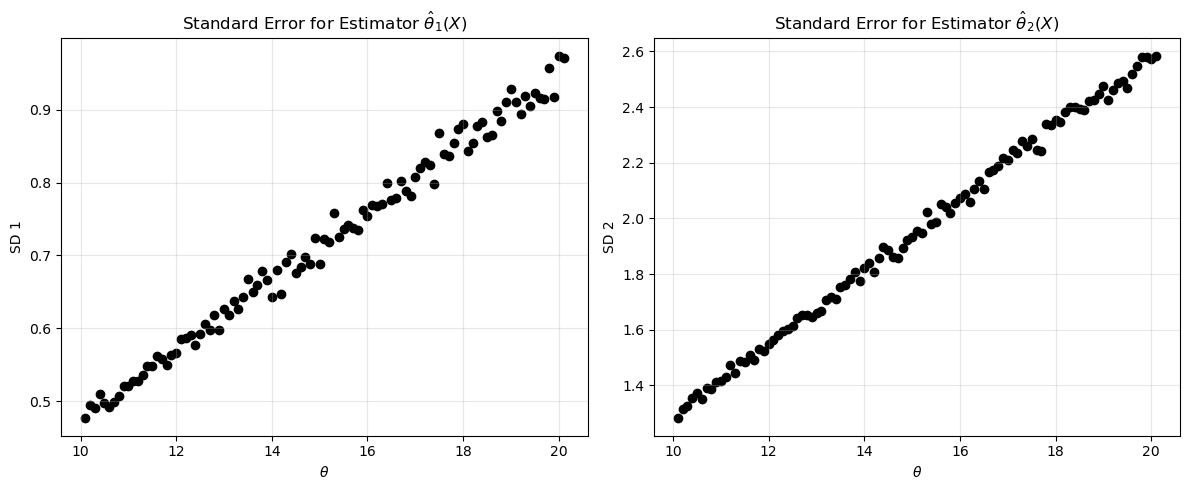

In [12]:
n, m, J = 5000, 20, 100
theta = []
sd_1 = []
sd_2 = []

for j in range(J+1):
    rational_p = 10 + (j+1)/10
    theta.append(rational_p)
    estim_1 = []
    estim_2 = []

    for i in range(n):
        u = np.random.uniform(0, rational_p, m)
        estim_1.append(21 * np.max(u)/m)
        estim_2.append(2*np.mean(u))

    sd_1.append(np.std(estim_1))
    sd_2.append(np.std(estim_2))

# plot
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].scatter(theta, sd_1, color='black')
axes[0].set_xlabel(r"$\theta$")
axes[0].set_ylabel('SD 1')
axes[0].set_title('Standard Error for Estimator $\hat{\\theta}_{1}(X)$')
axes[0].grid(True, alpha=0.3)

axes[1].scatter(theta, sd_2, color='black')
axes[1].set_xlabel(r"$\theta$")
axes[1].set_ylabel('SD 2')
axes[1].set_title('Standard Error for Estimator $\hat{\\theta}_{2}(X)$')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Part 8

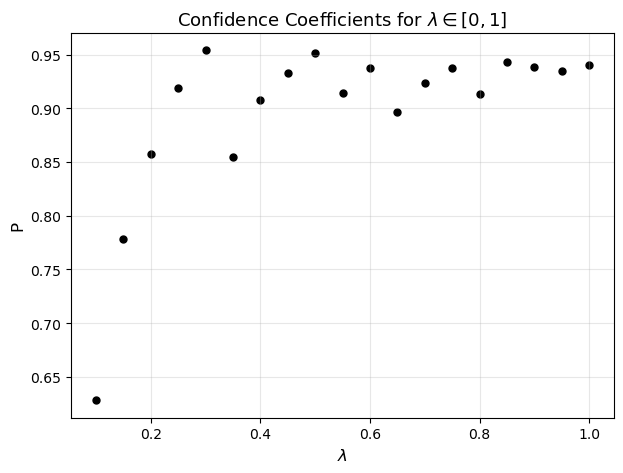

In [19]:
n = 10
N = 5000
lambdas = []
P = []

for i in range(1, 20):
    lam = 0.05 * (i + 1)
    lambdas.append(lam)
    k = 0
    for j in range(N):
        X = np.random.poisson(lam, n)
        m = np.mean(X)
        d = np.std(X, ddof=1) * sc.stats.t.ppf(0.975, df=n-1) / np.sqrt(n)
        if (m - d <= lam) and (lam <= m + d):
            k += 1
    P.append(k / N)

# plot
plt.figure(figsize=(7, 5))
plt.scatter(lambdas, P, color='black', s=25)
plt.xlabel(r'$\lambda$', fontsize=12)
plt.ylabel('P', fontsize=12)
plt.title(r'Confidence Coefficients for $\lambda \in [0,1]$', fontsize=13)
plt.grid(alpha=0.3)
plt.show()


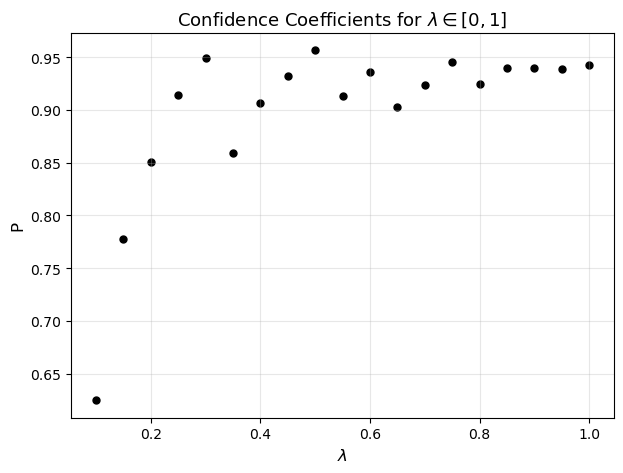

In [21]:
# OR
n = 10
N = 5000
lambdas = 0.05 * np.arange(2, 21)
t_crit = sc.stats.t.ppf(0.975, df=n-1)

# Vectorized simulation
# Shape: (len(lambdas), N, n)
X = np.random.poisson(lambdas[:, None, None], size=(len(lambdas), N, n))

# Compute sample means and SDs across axis=2
means = X.mean(axis=2)
sds = X.std(axis=2, ddof=1)
d = sds * t_crit / np.sqrt(n)

# Check coverage condition
inside = (means - d <= lambdas[:, None]) & (lambdas[:, None] <= means + d)

# Compute coverage probabilities
P = inside.mean(axis=1)

# plot
plt.figure(figsize=(7, 5))
plt.scatter(lambdas, P, color='black', s=25)
plt.xlabel(r'$\lambda$', fontsize=12)
plt.ylabel('P', fontsize=12)
plt.title(r'Confidence Coefficients for $\lambda \in [0,1]$', fontsize=13)
plt.grid(alpha=0.3)
plt.show()